<a href="https://colab.research.google.com/github/camaradaneto/python_para_investimentos/blob/master/Aloca%C3%A7%C3%A3o_e_Otimiza%C3%A7%C3%A3o_de_Portf%C3%B3lio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,OI,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,6.753943,14.990000,15.200000,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,6.268853,14.850000,15.000000,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,5.373302,15.210000,14.800000,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,5.283747,14.550000,14.670000,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,5.335988,14.270000,14.150000,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...,...
1567,2021-05-03,1.740000,23.440001,22.950001,34.450001,20.180000,32.450001,114.650002
1568,2021-05-04,1.700000,23.170000,23.040001,33.700001,19.750000,32.380001,113.160004
1569,2021-05-05,1.720000,24.190001,23.450001,34.709999,19.900000,32.570000,115.190002
1570,2021-05-06,1.710000,23.910000,23.350000,33.730000,19.459999,33.060001,115.199997


## Alocação aleatória de ativos

In [3]:
def alocacao_ativos(dataset, dinheiro_total, seed=0, melhores_pesos = []):
    dataset = dataset.copy()
    
    if seed != 0:
        np.random.seed(seed)
        
    if len(melhores_pesos) > 0:
        pesos = melhores_pesos
    else:      
        pesos = np.random.random(len(dataset.columns)-1)
        pesos = pesos / pesos.sum()
    
    colunas = dataset.columns[1:]
    for i in colunas:
        dataset[i] = (dataset[i]/dataset[i][0])
    
    #print(pesos, pesos.sum())
    for i, acao in enumerate(dataset.columns[1:]):
        dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
        
    dataset['soma valor'] = dataset.sum(axis=1)
    
    datas = dataset['Date']

    dataset.drop(labels=['Date'], axis=1, inplace=True)
    dataset['taxa retorno'] = 0.0
    
    for i in range(1, len(dataset)):
        dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i-1])-1)*100
        
    acoes_pesos = pd.DataFrame(data={'Ações': colunas, 'Pesos': pesos *100})
    
    return dataset, datas, acoes_pesos, dataset.loc[len(dataset)-1]['soma valor']

In [4]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(dataset, 5000, 10)

In [5]:
dataset

,OI,GOL,CVC,WEGE,MGLU,TOTS,BOVA,soma valor,taxa retorno
0,1245.716637,33.515308,1023.369665,1209.351082,805.110669,363.056433,319.880206,5000.000000,0.000000
1,1156.245286,33.202291,1009.904288,1217.596690,820.240283,351.901088,313.517807,4902.607732,-1.947845
2,991.067249,34.007194,996.438910,1199.535077,809.433416,329.894610,315.277636,4675.654093,-4.629243
3,974.549507,32.531537,987.686398,1185.792397,836.452311,327.562106,325.904209,4670.478466,-0.110693
4,984.184959,31.905501,952.676352,1205.817348,829.968190,335.168042,328.340855,4668.061247,-0.051755
...,...,...,...,...,...,...,...,...,...
1567,320.930599,52.408195,1545.153611,7033.869670,69786.494621,989.125727,776.010735,80503.993158,0.481683
1568,313.552891,51.804516,1551.213047,6880.737533,68299.467191,986.992029,765.925656,78849.692863,-2.054929
1569,317.241745,54.085078,1578.817088,7086.955135,68818.196002,992.783478,779.665742,79627.744268,0.986753
1570,315.397318,53.459040,1572.084367,6886.862569,67296.585773,1007.719480,779.733390,77911.841936,-2.154905


In [6]:
acoes_pesos

,Ações,Pesos
0,OI,24.914333
1,GOL,0.670306
2,CVC,20.467393
3,WEGE,24.187022
4,MGLU,16.102213
5,TOTS,7.261129
6,BOVA,6.397604


In [7]:
soma_valor

79430.18461681642

### Visualização dos dados

In [8]:
figura = px.line(x=datas, y=dataset['taxa retorno'], title='Retorno diário do portfólio')
figura.show()

In [9]:
figura = px.line(title='Evolução do patrimônio')
for i in dataset.drop(columns=['soma valor', 'taxa retorno']).columns:
    figura.add_scatter(x=datas, y=dataset[i], name=i)
figura.show()

In [10]:
figura = px.line(x=datas, y=dataset['soma valor'], title='Evolução do patrimônio')
figura.show()

## Mais Cálculos no portfólio

### Retorno acumulado em todo o período

In [11]:
dataset.loc[len(dataset)-1]['soma valor'] / dataset.loc[0]['soma valor']-1

14.886036923363283

### Desvio Padrão

In [12]:
dataset['taxa retorno'].std()

2.5231543347691265

### Sharpe Ratio

Métrica para sabermos o retorno do investimento considerando o risco.  
  * Resultado do investimento - resultado de investimento sem risco.  
  
Quanto maior o resultado, melhor (>1 bom, >2 mt bom, >3 excelente)

In [13]:
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std()) * np.sqrt(246)

1.2934209569755313

In [14]:
dinheiro_total = 5000
soma_valor - dinheiro_total

74430.18461681642

In [15]:
taxa_selic_2015 = 12.75
taxa_selic_2016 = 14.25
taxa_selic_2017 = 12.25
taxa_selic_2018 = 6.5
taxa_selic_2019 = 5.0
taxa_selic_2020 = 2.0

In [16]:
valor2015 = dinheiro_total + (dinheiro_total * taxa_selic_2015 / 100)
valor2015

5637.5

In [17]:
valor2016 = valor2015 + (valor2015 * taxa_selic_2016 / 100)
valor2016

6440.84375

In [18]:
valor2017 = valor2016 + (valor2016 * taxa_selic_2017 / 100)
valor2017

7229.8471093749995

In [19]:
valor2018 = valor2017 + (valor2017 * taxa_selic_2018 / 100)
valor2018

7699.787171484374

In [20]:
valor2019 = valor2018 + (valor2018 * taxa_selic_2019 / 100)
valor2019

8084.7765300585925

In [21]:
valor2020 = valor2019 + (valor2019 * taxa_selic_2020 / 100)
valor2020

8246.472060659764

In [22]:
rendimentos = valor2020 - dinheiro_total

In [23]:
ir = rendimentos * 0.15
ir

486.97080909896454

In [24]:
valor2020 - ir

7759.5012515608

In [25]:
taxa_selic_historico = np.array([12.75, 14.25, 12.25, 6.5, 5.0, 2.0])
taxa_selic_historico.mean()

8.791666666666666

In [26]:
(dataset['taxa retorno'].mean() - taxa_selic_historico.mean()/100) / dataset['taxa retorno'].std() * np.sqrt(246)

0.7469149358510215

## Otimização do Portfólio - randômico

### Markowitz

In [51]:
def alocacao_portfolio(dataset, dinheiro_total, sem_risco, repeticoes):
    dataset = dataset.copy()
    dataset_original = dataset.copy()
    
    lista_retorno_esperado = []
    lista_volatilidade_esperada = []
    lista_sharpe_ratio = []
    
    melhor_sharpe_ratio = -100000
    melhores_pesos = np.empty
    melhor_volatilidade = 0
    melhor_retorno = 0
    
    for _ in range(repeticoes):
        pesos = np.random.random(len(dataset.columns)-1)
        pesos = pesos / pesos.sum()
        
        for i in dataset.columns[1:]:
            dataset[i] = dataset[i] / dataset[i][0]

        for i, acao in enumerate(dataset.columns[1:]):
            dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

        dataset.drop(labels=['Date'], axis=1, inplace=True)
        
        retorno_carteira = np.log(dataset / dataset.shift(1))
        matriz_covariancia = retorno_carteira.cov()

        dataset['soma valor'] = dataset.sum(axis=1)
        dataset['taxa retorno'] = 0.0

        for i in range(1, len(dataset)):
            dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i-1])

        #(dataset['taxa retorno'].mean() - taxa_selic_historico.mean()/100) / dataset['taxa retorno'].std() * np.sqrt(246)
        retorno_esperado = np.sum(dataset['taxa retorno'].mean() * pesos) * 246
        volatilidade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covariancia * 246, pesos)))
        sharpe_ratio = (retorno_esperado - sem_risco) / volatilidade_esperada

        if sharpe_ratio > melhor_sharpe_ratio:
            melhor_sharpe_ratio = sharpe_ratio
            melhores_pesos = pesos
            melhor_volatilidade = volatilidade_esperada
            melhor_retorno = retorno_esperado

        lista_retorno_esperado.append(retorno_esperado)
        lista_volatilidade_esperada.append(volatilidade_esperada)
        lista_sharpe_ratio.append(sharpe_ratio)
        
        dataset = dataset_original.copy()
    
    return melhor_sharpe_ratio, melhores_pesos, lista_sharpe_ratio, lista_volatilidade_esperada, lista_retorno_esperado, melhor_volatilidade, melhor_retorno

In [52]:
sharpe_ratio, melhores_pesos, ls_sharpe_ratio, ls_volatilidade, ls_retorno, melhor_volatilidade, melhor_retorno = alocacao_portfolio(pd.read_csv('acoes.csv'), 5000, taxa_selic_historico.mean()/100, 1000)

In [53]:
sharpe_ratio, melhores_pesos

(1.295865488271166,
 array([0.11814769, 0.01499593, 0.01225176, 0.18091459, 0.2974074 ,
        0.22251547, 0.15376716]))

In [54]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhores_pesos)

In [55]:
acoes_pesos, soma_valor

(  Ações      Pesos
 0    OI  11.814769
 1   GOL   1.499593
 2   CVC   1.225176
 3  WEGE  18.091459
 4  MGLU  29.740740
 5  TOTS  22.251547
 6  BOVA  15.376716, 137607.18836619807)

In [56]:
print(ls_retorno)

[0.4848839224208811, 0.3218998208441359, 0.4134304448855984, 0.3971678463760272, 0.2488971734139262, 0.4447970919012307, 0.5389331764122566, 0.29491728832135133, 0.2588206316077763, 0.48736754298449086, 0.3998327169849274, 0.38246805182905785, 0.3722589222257808, 0.4996910525845962, 0.367070304711683, 0.4293585023903902, 0.25303533614990636, 0.23065107616565678, 0.43445899877184757, 0.43920744587458593, 0.44122584363337575, 0.4362233016278614, 0.5187541044354813, 0.45189033963741027, 0.4200172225714521, 0.47131388888440795, 0.2881233799435695, 0.2315447534898013, 0.46554795687986816, 0.34300753753365393, 0.407825042717663, 0.49915719237238565, 0.42652285675891405, 0.3757954086297176, 0.5075800561583292, 0.3434046881594675, 0.3772471438047861, 0.4551922358117277, 0.48019299935089027, 0.5058766535924064, 0.23700685970495322, 0.4321822531857416, 0.4821937478887336, 0.45595958213133647, 0.34918798061724193, 0.3540006553699866, 0.37002279108286046, 0.4665293726172689, 0.36742407685917844, 0

In [57]:
print(ls_volatilidade)

[0.40867944080142077, 0.34748750532115713, 0.319204420178778, 0.3475047180147748, 0.3018679747200409, 0.3543810144569623, 0.38883720696929136, 0.36352974145253714, 0.39338987433663253, 0.3877555488724362, 0.3790954697063541, 0.32072855748549073, 0.30244146348709605, 0.36689454294890284, 0.40895172050914025, 0.46014616687177035, 0.34210037383591274, 0.32838073539233453, 0.355757254491006, 0.36204924494460916, 0.3926338217878062, 0.3602242601077131, 0.33247080169069204, 0.3603733670805053, 0.3493842261472925, 0.34613421752969314, 0.31785862109015334, 0.3542162636876243, 0.3836037367647776, 0.32753682758864144, 0.3102155064865985, 0.4152840960701271, 0.40090189134879833, 0.3613488635033475, 0.42204045893007147, 0.3677233547567773, 0.3709980732758163, 0.32084996105364727, 0.367030287756762, 0.36499591887731636, 0.3743429417203071, 0.40846943205346853, 0.383324366404424, 0.3833577831736518, 0.43173413299844926, 0.32470248853422, 0.3571847849843312, 0.3614196737544843, 0.39235479745747004, 0

In [58]:
print(ls_sharpe_ratio)

[0.9713413891723089, 0.6733570289418488, 1.0197658855620484, 0.8899193699471216, 0.5332811700100233, 1.0070528913108727, 1.159910887286075, 0.5694186693709926, 0.43443915588651705, 1.0301615991812294, 0.8227902342380132, 0.9183821592678608, 0.9401563273788545, 1.1223235499996986, 0.682607809297081, 0.7420290775102201, 0.48266147046784086, 0.43466133702532056, 0.9740977245874883, 0.9702845237577119, 0.8998439700328476, 0.9669160951487421, 1.295865488271166, 1.009990488252241, 0.9505310516359126, 1.1076547847652525, 0.6298608878068429, 0.40548134444159, 0.9844306872452644, 0.7788158441448906, 1.031245599790211, 0.9902631225161936, 0.8446111066052528, 0.796678144140293, 0.9943676740271891, 0.6947832336126377, 0.7798705653196706, 1.14469569495647, 1.068784636498971, 1.1451086582319454, 0.3982716819853394, 0.8428184816385739, 1.0285729679028213, 0.9600507192466606, 0.6051671479760293, 0.8194701244960667, 0.7898044269398796, 1.0475708253994975, 0.7123843317420108, 0.9208843895156316, 0.37236

In [59]:
melhor_retorno, melhor_volatilidade

(0.5187541044354813, 0.33247080169069204)

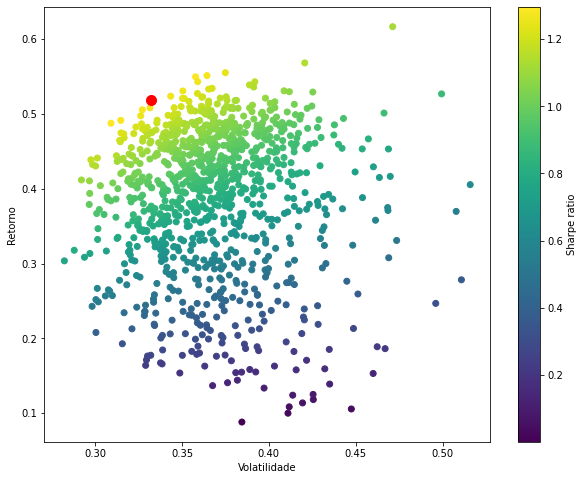

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(ls_volatilidade,ls_retorno, c=ls_sharpe_ratio)
plt.colorbar(label = 'Sharpe ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(melhor_volatilidade, melhor_retorno, c='red', s=100)

## Otimização de portfólio com algoritmos de otimização

* Biblioteca mlrose  
Usada para maximizar ou minimizar valores

In [38]:
#!pip install mlrose

In [39]:
import mlrose

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [42]:
taxa_selic_historico

array([12.75, 14.25, 12.25,  6.5 ,  5.  ,  2.  ])

In [65]:
dataset_original = pd.read_csv('acoes.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean()/100

In [66]:
def fitness_function(solucao): # O conjunto de pesos que o algoritmo deve encontrar chama-se solução
  dataset = dataset_original.copy()
  pesos = solucao / solucao.sum() #normaliza os pesos para ficarem com somatória = 1

  for i in dataset.columns[1:]:
      dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
      dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

  dataset.drop(labels=['Date'], axis=1, inplace=True)
  
  dataset['soma valor'] = dataset.sum(axis=1)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
      dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i-1])-1)*100

  sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)

  return sharpe_ratio


In [67]:
np.random.seed(10)
pesos = np.random.random(len(dataset_original.columns)-1)
pesos = pesos / pesos.sum()
pesos

array([0.24914333, 0.00670306, 0.20467393, 0.24187022, 0.16102213,
       0.07261129, 0.06397604])

In [68]:
fitness_function(pesos) # retorna o sharpe ratio (mede o resultado considerando o risco)

0.7469149358510215

In [69]:
def visualiza_alocacao(solucao):
  coluna = dataset_original.columns[1:]
  for i in range(len(solucao)):
    print(coluna[i], solucao[i]*100)

In [70]:
visualiza_alocacao(pesos)

OI 24.914332749281414
GOL 0.6703061509499426
CVC 20.46739330622125
WEGE 24.187021644471944
MGLU 16.102213380099645
TOTS 7.26112865844941
BOVA 6.397604110526392


In [71]:
fitness = mlrose.CustomFitness(fitness_function)

In [73]:
problema_maximizacao = mlrose.ContinuousOpt(length=7, fitness_fn=fitness, maximize=True, min_val=0, max_val=1)

In [74]:
problema_minimizazao = mlrose.ContinuousOpt(length=7, fitness_fn=fitness, maximize=False, min_val=0, max_val=1)

### Hill Climb

In [76]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state=1)
melhor_solucao, melhor_custo

(array([0.        , 0.        , 0.10011437, 0.20233257, 1.        ,
        0.        , 0.        ]), 1.0989504330097002)

In [77]:
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

array([0.        , 0.        , 0.07686637, 0.15534803, 0.76778559,
       0.        , 0.        ])

In [79]:
visualiza_alocacao(melhor_solucao)

OI 0.0
GOL 0.0
CVC 7.686637449104304
WEGE 15.53480339664536
MGLU 76.77855915425033
TOTS 0.0
BOVA 0.0


In [83]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)

In [84]:
soma_valor

332961.9151060886

In [85]:
pior_solucao, pior_custo = mlrose.hill_climb(problema_minimizazao, random_state=1)
pior_solucao, pior_custo

(array([1.        , 0.        , 0.10011437, 0.        , 0.        ,
        0.        , 0.28626021]), -0.46008424766366257)

In [86]:
pior_solucao = pior_solucao / pior_solucao.sum()
pior_solucao

array([0.72130578, 0.        , 0.07221308, 0.        , 0.        ,
       0.        , 0.20648114])

In [87]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=pior_solucao)

In [88]:
soma_valor

4074.439189298664

### Simulated Anneling

In [93]:
melhor_solucao, melhor_custo =  mlrose.simulated_annealing(problema_maximizacao, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.125     , 0.        , 0.        , 0.        , 0.41666667,
        0.33333333, 0.125     ]), 0.9725697470660052)

In [94]:
visualiza_alocacao(melhor_solucao)

OI 12.5
GOL 0.0
CVC 0.0
WEGE 0.0
MGLU 41.666666666666664
TOTS 33.33333333333333
BOVA 12.500000000000005


In [95]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)

In [96]:
soma_valor

184458.0225564225

### Algorítmo Genético

In [97]:
problema_maximizacao_ag = mlrose.ContinuousOpt(length=7, fitness_fn=fitness, maximize=True, min_val=0.1, max_val=1)
# Precisamos colocar 0.1 no mínimo para não haver erro

In [98]:
melhor_solucao, melhor_custo =  mlrose.genetic_alg(problema_maximizacao_ag, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.0731455 , 0.11072884, 0.05628771, 0.07393923, 0.4006491 ,
        0.22822354, 0.05702609]), 0.9707415868265563)

In [99]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

178654.93172394848

## Exercício